In [5]:
import numpy as np
import pandas as pd

In [6]:
#airdata=pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", sep="\s+", header=None, names=['City1', 'City2', 'Average Fare', 'Distance','Average weekly passengers', 'market leading airline','market share', 'Average fare', 'Low price airline', 'market share', 'price'])
airdata=pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", sep="\s+", header=None)
airdata.columns = ['City1', 'City2', 'AverageFare', 'Distance','AverageWeeklyPassengers', 'MarketLeadingAirline','MarketShare1', 'AverageFare2', 'LowPriceAirline', 'MarketShare2', 'Price']
airdata.info()
airdata.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                      1000 non-null object
City2                      1000 non-null object
AverageFare                1000 non-null float64
Distance                   1000 non-null int64
AverageWeeklyPassengers    1000 non-null float64
MarketLeadingAirline       1000 non-null object
MarketShare1               1000 non-null float64
AverageFare2               1000 non-null float64
LowPriceAirline            1000 non-null object
MarketShare2               1000 non-null float64
Price                      1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


,count,mean,std,min,25%,50%,75%,max
AverageFare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
AverageWeeklyPassengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
MarketShare1,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
AverageFare2,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
MarketShare2,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [7]:
#from scipy import stats
#airdata[(np.abs(stats.zscore(airdata)) < 3).all(axis=1)]

In [8]:
airdata.shape

(1000, 11)

In [9]:
Q1, Q3= np.percentile(airdata["AverageFare"],[25,75])
IQR = Q3-Q1
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
airdata = airdata.query('@Lower_bound <= AverageFare <= @Upper_bound')

airdata.shape

(985, 11)

In [10]:
Q1, Q3= np.percentile(airdata["Distance"],[25,75])
IQR = Q3-Q1
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
airdata = airdata.query('@Lower_bound <= Distance <= @Upper_bound')

airdata.shape

(981, 11)

In [11]:
Q1, Q3= np.percentile(airdata["AverageWeeklyPassengers"],[25,75])
IQR = Q3-Q1
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
airdata = airdata.query('@Lower_bound <= AverageWeeklyPassengers <= @Upper_bound')

airdata.shape

(904, 11)

In [12]:
Q1, Q3= np.percentile(airdata["MarketShare1"],[25,75])
IQR = Q3-Q1
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
airdata = airdata.query('@Lower_bound <= MarketShare1 <= @Upper_bound')

airdata.shape

(904, 11)

In [13]:
Q1, Q3= np.percentile(airdata["AverageFare2"],[25,75])
IQR = Q3-Q1
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
airdata = airdata.query('@Lower_bound <= AverageFare2 <= @Upper_bound')

airdata.shape

(901, 11)

In [14]:
Q1, Q3= np.percentile(airdata["MarketShare2"],[25,75])
IQR = Q3-Q1
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
airdata = airdata.query('@Lower_bound <= MarketShare2 <= @Upper_bound')

airdata.shape

(901, 11)

In [15]:
Q1, Q3= np.percentile(airdata["Price"],[25,75])
IQR = Q3-Q1
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
airdata = airdata.query('@Lower_bound <= Price <= @Upper_bound')

airdata.shape

(877, 11)

In [16]:
##Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [17]:
X = airdata[['City1', 'City2', 'Distance','AverageWeeklyPassengers', 'MarketLeadingAirline','MarketShare1', 'AverageFare2', 'LowPriceAirline', 'MarketShare2', 'Price']]
y = airdata['AverageFare']

In [18]:
#Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [19]:
airdata.corr()

,AverageFare,Distance,AverageWeeklyPassengers,MarketShare1,AverageFare2,MarketShare2,Price
AverageFare,1.000000,0.512280,-0.194769,-0.202205,0.979853,-0.498025,0.837329
Distance,0.512280,1.000000,-0.123024,-0.546091,0.480295,-0.361306,0.531995
AverageWeeklyPassengers,-0.194769,-0.123024,1.000000,0.018146,-0.160751,0.074210,-0.206307
MarketShare1,-0.202205,-0.546091,0.018146,1.000000,-0.188915,0.280194,-0.309026
AverageFare2,0.979853,0.480295,-0.160751,-0.188915,1.000000,-0.522616,0.790611
MarketShare2,-0.498025,-0.361306,0.074210,0.280194,-0.522616,1.000000,-0.261714
Price,0.837329,0.531995,-0.206307,-0.309026,0.790611,-0.261714,1.000000


In [38]:
airdata_pv = airdata.drop(labels = ["AverageWeeklyPassengers", "MarketShare1",  "MarketShare2" ], axis = 1)
airdata_pv.head()

,City1,City2,AverageFare,Distance,MarketLeadingAirline,AverageFare2,LowPriceAirline,Price
0,16,0,114.47,528,6,111.03,7,111.03
1,16,40,122.47,860,6,123.09,5,118.94
2,2,0,214.42,852,4,223.98,4,167.12
3,2,7,69.40,288,14,68.86,16,68.86
4,2,52,158.13,723,12,161.36,16,145.42


In [39]:
##Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

In [40]:
#import matplotlib.pyplot as plt
#plt.scatter(X, y)
#plt.plot(X,y)

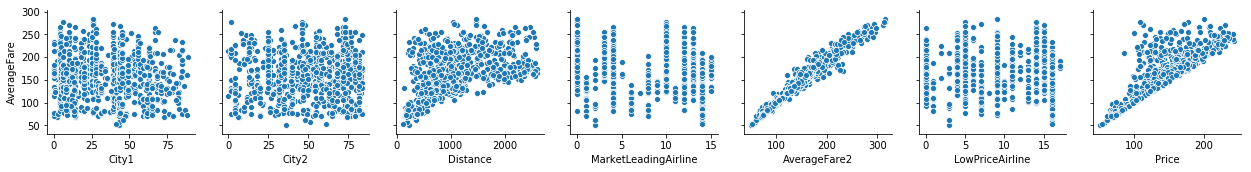

In [41]:
import seaborn as sns
pp = sns.pairplot(data=airdata_pv,
                  y_vars=['AverageFare'],
                  x_vars=['City1', 'City2', 'Distance','MarketLeadingAirline', 'AverageFare2', 'LowPriceAirline', 'Price'])

In [42]:
X = airdata_pv.loc[:, airdata_pv.columns != 'AverageFare']
Y = airdata_pv['AverageFare']
print(X.shape , Y.shape)

(877, 7) (877,)


In [43]:
#Splitting data into train and test. Splitting in 70:30 ratio.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [44]:
print('X Train',X_train.shape,'\n','X Test',X_test.shape,'\n','Y Train',Y_train.shape,'\n','Y Test',Y_test.shape)

X Train (613, 7) 
 X Test (264, 7) 
 Y Train (613,) 
 Y Test (264,)


In [45]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
regressor.coef_

array([ 0.01627005, -0.02300258,  0.002601  , -0.15745547,  0.76621038,
        0.0435516 ,  0.1797451 ])

In [47]:
#Coefficients of the model

coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,City1,0.016270
1,City2,-0.023003
2,Distance,0.002601
3,MarketLeadingAirline,-0.157455
4,AverageFare2,0.766210
5,LowPriceAirline,0.043552
6,Price,0.179745


In [48]:
regressor.intercept_

9.235858549491269

In [49]:
#Print the accuracy of the overall model (2.5 points)

regressor.score(X_test, Y_test)

0.9768195402385488